In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
len(tf.config.list_physical_devices("GPU"))>0

True

In [3]:
bs = 32
img_size = 128

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

In [4]:
dataset = image_dataset_from_directory(
    'Merged_cats_dogs',
    batch_size = bs,
    seed = 42,
    image_size = (img_size,img_size)
)

Found 25000 files belonging to 2 classes.


In [5]:
dataset_size = len(dataset)
train_size = int(train_ratio*dataset_size)
val_size = int(val_ratio*dataset_size)
test_size = int(test_ratio*dataset_size)

train_ds = dataset.take(train_size)
remaining_ds = dataset.skip(train_size)
val_ds = remaining_ds.take(val_size)
test_ds = remaining_ds.skip(val_size)

print("Length of dataset: ",len(dataset))
print("Length of training set: ",len(train_ds))
print("Length of validation set: ",len(val_ds))
print("Length of testing set: ",len(test_ds))

Length of dataset:  782
Length of training set:  547
Length of validation set:  117
Length of testing set:  118


In [6]:
num_classes = len(dataset.class_names)

dataset.class_names

['cats', 'dogs']

[[[104.89111   84.5177    55.701538]
  [ 71.96399   66.13904   47.470337]
  [102.44531   80.31506   50.960938]
  ...
  [ 79.61719   75.61719   72.61719 ]
  [ 72.84375   68.84375   65.84375 ]
  [ 75.375     71.375     68.375   ]]

 [[ 80.45154   67.80005   53.543823]
  [ 53.769043  55.142334  51.147095]
  [ 83.11719   68.203125  53.703125]
  ...
  [ 75.61731   71.61731   68.61731 ]
  [ 73.49524   69.49524   66.49524 ]
  [ 78.75      74.75      71.75    ]]

 [[103.95569   84.00256   70.29419 ]
  [ 72.437256  65.0155    62.57019 ]
  [104.06531   82.22656   67.67688 ]
  ...
  [ 75.75      71.75      68.75    ]
  [ 68.820435  64.820435  61.820435]
  [ 64.296875  60.296875  57.296875]]

 ...

 [[136.56506  122.56506  109.56506 ]
  [135.54675  121.54675  108.54675 ]
  [135.23999  121.23999  108.23999 ]
  ...
  [121.32654   98.30029   85.839355]
  [107.07837   80.257935  67.70325 ]
  [103.81763   81.622314  68.427   ]]

 [[129.6875   115.6875   102.6875  ]
  [135.35938  121.359375 108.359375]


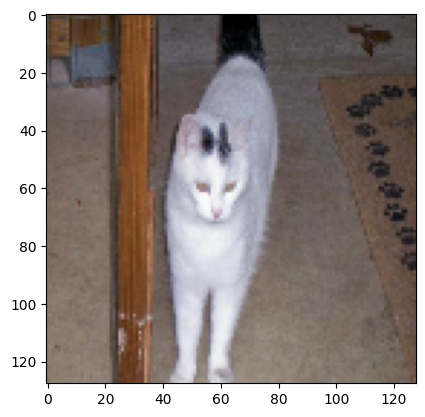

In [7]:
for image_batch,label_batch in train_ds.take(1):
    plt.imshow(image_batch[1].numpy().astype("uint8"))
    print(image_batch[1].numpy())

In [8]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), input_shape = (128,128,3), activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),padding='same', activation ='relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'), 
    layers.Dense(num_classes,activation = 'softmax')   
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 dropout (Dropout)           (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 63, 63, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                    

In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

model_history= model.fit(train_ds, validation_data=val_ds, epochs = 10)

Epoch 1/10
547/547 [==============================] - 38s 67ms/step - loss: 0.6399 - accuracy: 0.6307 - val_loss: 0.6471 - val_accuracy: 0.6116
Epoch 2/10
547/547 [==============================] - 35s 65ms/step - loss: 0.5912 - accuracy: 0.6850 - val_loss: 0.6108 - val_accuracy: 0.6549
Epoch 3/10
547/547 [==============================] - 35s 64ms/step - loss: 0.5492 - accuracy: 0.7207 - val_loss: 0.6006 - val_accuracy: 0.6386
Epoch 4/10
547/547 [==============================] - 35s 63ms/step - loss: 0.5127 - accuracy: 0.7502 - val_loss: 0.6243 - val_accuracy: 0.6076
Epoch 5/10
547/547 [==============================] - 35s 64ms/step - loss: 0.4771 - accuracy: 0.7720 - val_loss: 0.5543 - val_accuracy: 0.6878
Epoch 6/10
547/547 [==============================] - 35s 64ms/step - loss: 0.4544 - accuracy: 0.7898 - val_loss: 0.5990 - val_accuracy: 0.6408
Epoch 7/10
547/547 [==============================] - 35s 64ms/step - loss: 0.4224 - accuracy: 0.8075 - val_loss: 0.6002 - val_accuracy:

In [17]:
model.evaluate(test_ds)

118/118 [==============================] - 10s 21ms/step - loss: 0.4871 - accuracy: 0.7361


[0.4871481657028198, 0.7361407279968262]

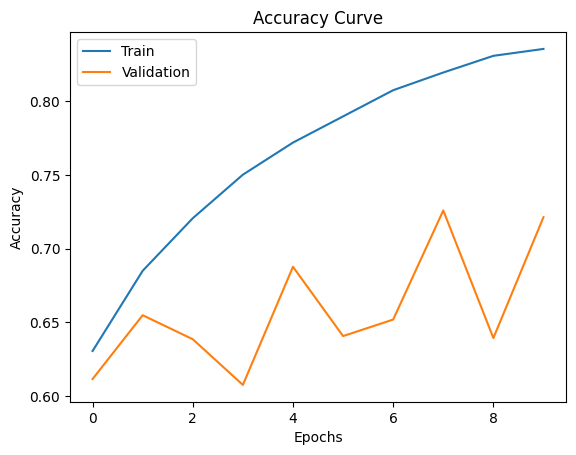

In [15]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend(['Train', 'Validation'])

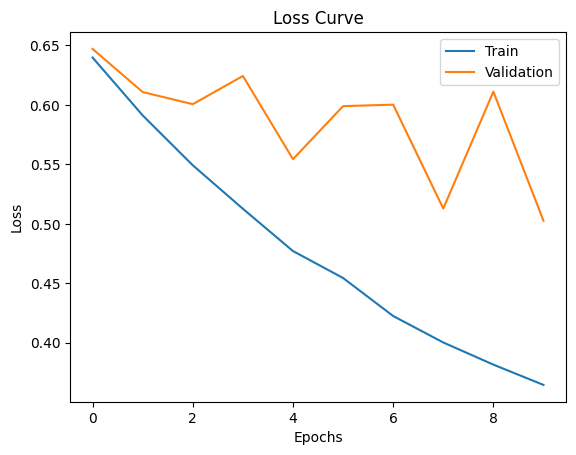

In [16]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(['Train','Validation'])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true=[]
y_pred=[]

for images,labels in test_ds:
    predictions=model.predict(images, verbose=0)
    predicted_labels=tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())
    
cm=confusion_matrix(y_true,y_pred,labels=range(2))
class_names=dataset.class_names

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
# Add labels to each cell
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'),
        ha="center", va="center",
        color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

Using Batch Normalization


In [21]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), input_shape = (128,128,3), activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),padding='same', activation ='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'), 
    layers.Dense(num_classes,activation = 'softmax')   
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 dropout_4 (Dropout)         (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 63, 63, 64)      

In [23]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

model_history= model.fit(train_ds, validation_data=val_ds, epochs = 10)

Epoch 1/10
547/547 [==============================] - 50s 88ms/step - loss: 0.6007 - accuracy: 0.6741 - val_loss: 0.8160 - val_accuracy: 0.5302
Epoch 2/10
547/547 [==============================] - 49s 89ms/step - loss: 0.5028 - accuracy: 0.7539 - val_loss: 0.7311 - val_accuracy: 0.6362
Epoch 3/10
547/547 [==============================] - 48s 87ms/step - loss: 0.4136 - accuracy: 0.8078 - val_loss: 1.1878 - val_accuracy: 0.5943
Epoch 4/10
547/547 [==============================] - 48s 88ms/step - loss: 0.3548 - accuracy: 0.8422 - val_loss: 1.0667 - val_accuracy: 0.5940
Epoch 5/10
547/547 [==============================] - 47s 86ms/step - loss: 0.3184 - accuracy: 0.8606 - val_loss: 0.4945 - val_accuracy: 0.7583
Epoch 6/10
547/547 [==============================] - 47s 87ms/step - loss: 0.2818 - accuracy: 0.8799 - val_loss: 1.4097 - val_accuracy: 0.5072
Epoch 7/10
547/547 [==============================] - 48s 88ms/step - loss: 0.2582 - accuracy: 0.8909 - val_loss: 1.2668 - val_accuracy:

In [24]:
model.evaluate(test_ds)

118/118 [==============================] - 11s 21ms/step - loss: 0.4322 - accuracy: 0.8121


[0.432182639837265, 0.8121002316474915]

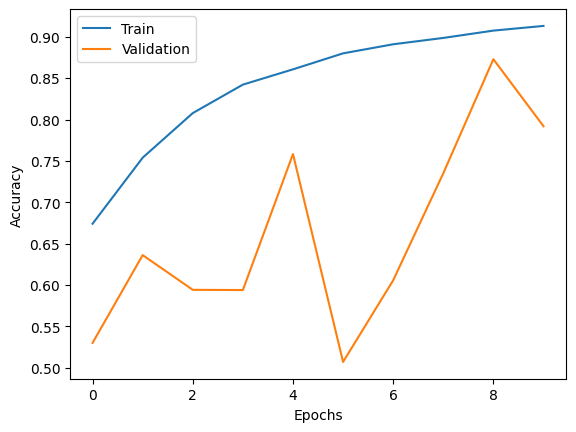

In [26]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

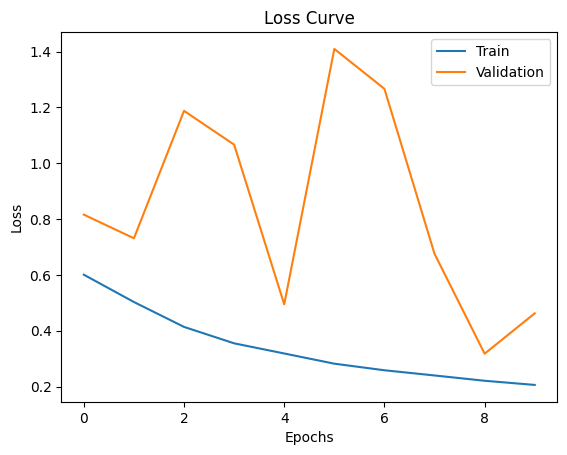

In [27]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(['Train','Validation'])

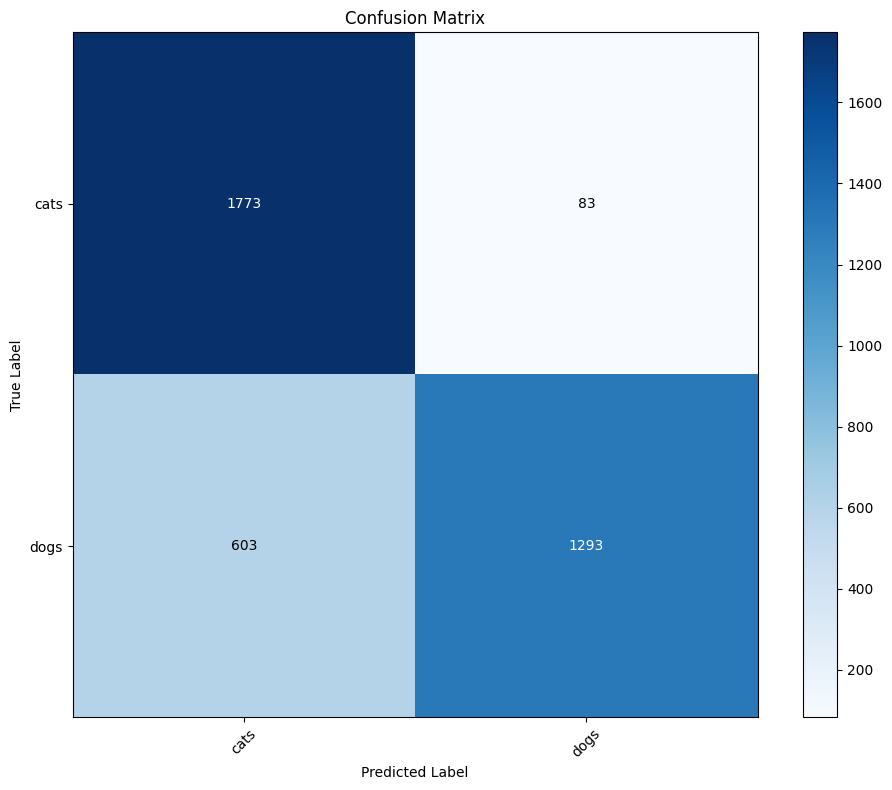

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true=[]
y_pred=[]

for images,labels in test_ds:
    predictions=model.predict(images, verbose=0)
    predicted_labels=tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())
    
cm=confusion_matrix(y_true,y_pred,labels=range(2))
class_names=dataset.class_names

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
# Add labels to each cell
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'),
        ha="center", va="center",
        color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

In [29]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), input_shape = (128,128,3), activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),padding='same', activation ='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Conv2D(64,(3,3),padding='same', activation ='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'), 
    layers.Dense(num_classes,activation = 'softmax')   
])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 63, 63, 64)      

In [31]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

model_history= model.fit(train_ds, validation_data=val_ds, epochs = 10)

Epoch 1/10
547/547 [==============================] - 65s 112ms/step - loss: 0.6050 - accuracy: 0.6706 - val_loss: 0.7398 - val_accuracy: 0.5494
Epoch 2/10
547/547 [==============================] - 63s 116ms/step - loss: 0.5092 - accuracy: 0.7531 - val_loss: 0.8552 - val_accuracy: 0.5900
Epoch 3/10
547/547 [==============================] - 64s 116ms/step - loss: 0.4210 - accuracy: 0.8064 - val_loss: 0.6799 - val_accuracy: 0.7057
Epoch 4/10
547/547 [==============================] - 64s 116ms/step - loss: 0.3527 - accuracy: 0.8407 - val_loss: 0.7167 - val_accuracy: 0.6488
Epoch 5/10
547/547 [==============================] - 63s 116ms/step - loss: 0.3004 - accuracy: 0.8686 - val_loss: 0.6904 - val_accuracy: 0.7073
Epoch 6/10
547/547 [==============================] - 63s 115ms/step - loss: 0.2776 - accuracy: 0.8823 - val_loss: 0.9911 - val_accuracy: 0.5652
Epoch 7/10
547/547 [==============================] - 63s 116ms/step - loss: 0.2451 - accuracy: 0.8945 - val_loss: 1.0400 - val_ac

In [32]:
model.evaluate(test_ds)

118/118 [==============================] - 10s 24ms/step - loss: 1.1339 - accuracy: 0.7367


[1.1339349746704102, 0.7366737723350525]

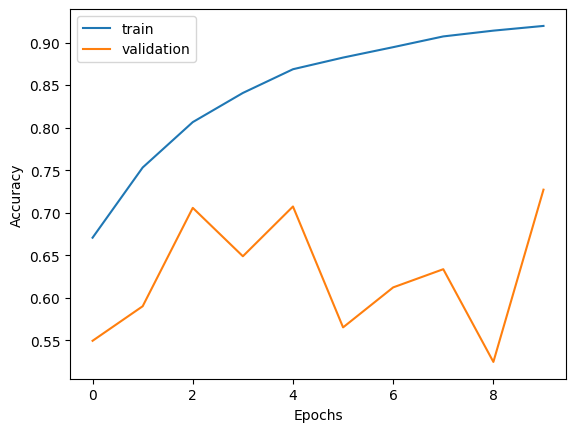

In [34]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

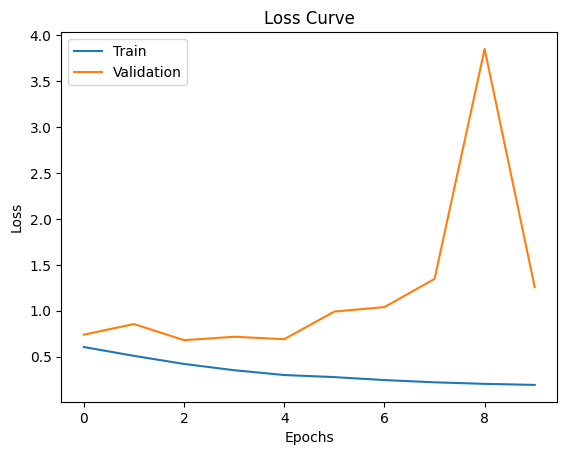

In [35]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(['Train','Validation'])

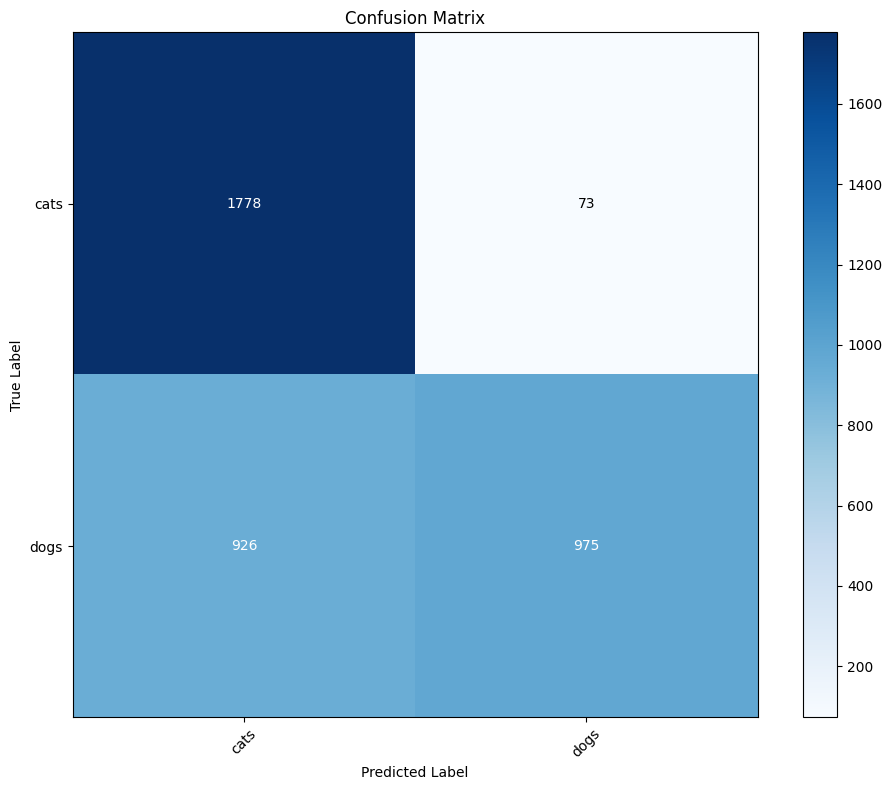

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true=[]
y_pred=[]

for images,labels in test_ds:
    predictions=model.predict(images, verbose=0)
    predicted_labels=tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())
    
cm=confusion_matrix(y_true,y_pred,labels=range(2))
class_names=dataset.class_names

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
# Add labels to each cell
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'),
        ha="center", va="center",
        color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

In [41]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), input_shape = (128,128,3), activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),padding='same', activation ='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Conv2D(64,(3,3),padding='same', activation ='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'), 
    layers.Dense(32,activation='relu'), 
    layers.Dense(num_classes,activation = 'softmax')   
])

In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_19 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 dropout_23 (Dropout)        (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 batch_normalization_20 (Bat  (None, 63, 63, 64)      

In [43]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

model_history= model.fit(train_ds, validation_data=val_ds, epochs = 10)

Epoch 1/10
547/547 [==============================] - 51s 89ms/step - loss: 0.6038 - accuracy: 0.6657 - val_loss: 1.1562 - val_accuracy: 0.5743
Epoch 2/10
547/547 [==============================] - 45s 82ms/step - loss: 0.4977 - accuracy: 0.7623 - val_loss: 0.8194 - val_accuracy: 0.6314
Epoch 3/10
547/547 [==============================] - 45s 81ms/step - loss: 0.4108 - accuracy: 0.8128 - val_loss: 1.1036 - val_accuracy: 0.5612
Epoch 4/10
547/547 [==============================] - 45s 82ms/step - loss: 0.3485 - accuracy: 0.8467 - val_loss: 0.7675 - val_accuracy: 0.6811
Epoch 5/10
547/547 [==============================] - 45s 82ms/step - loss: 0.3088 - accuracy: 0.8673 - val_loss: 0.6998 - val_accuracy: 0.7364
Epoch 6/10
547/547 [==============================] - 45s 82ms/step - loss: 0.2837 - accuracy: 0.8785 - val_loss: 0.6959 - val_accuracy: 0.7177
Epoch 7/10
547/547 [==============================] - 45s 81ms/step - loss: 0.2471 - accuracy: 0.8933 - val_loss: 0.8787 - val_accuracy:

In [44]:
model.evaluate(test_ds)

118/118 [==============================] - 8s 20ms/step - loss: 0.6593 - accuracy: 0.7735


[0.6592681407928467, 0.7734541296958923]

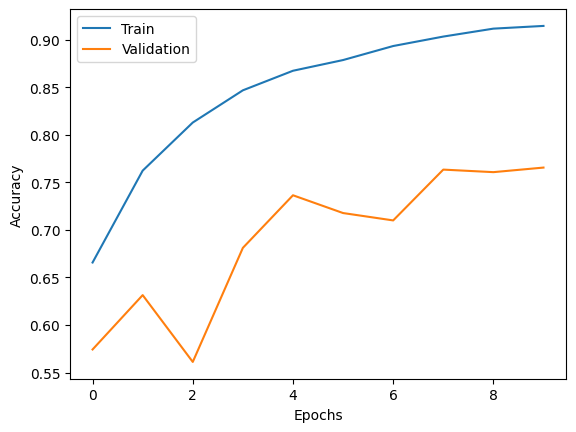

In [46]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

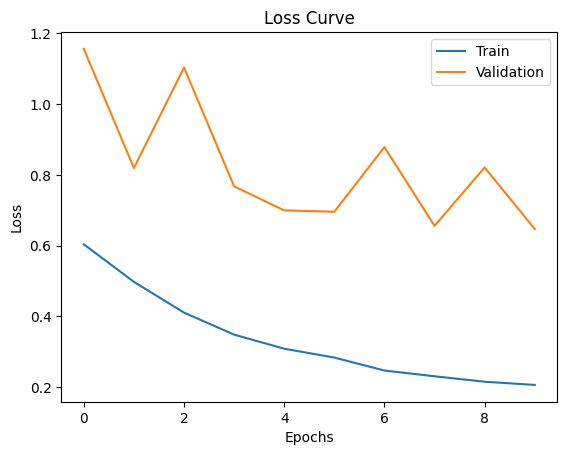

In [47]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(['Train','Validation'])

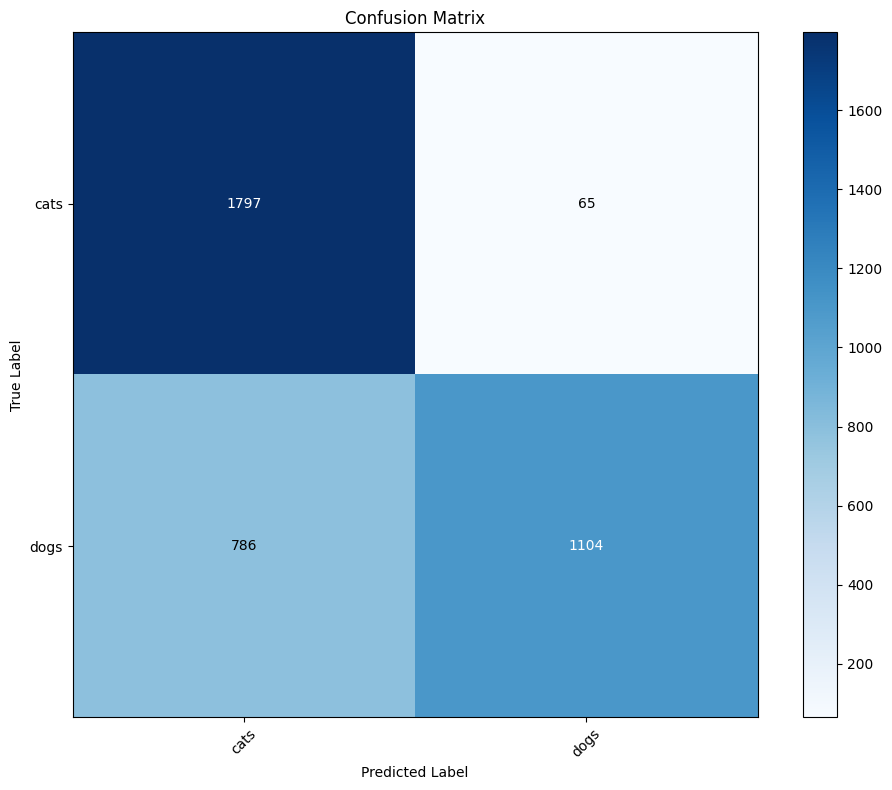

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true=[]
y_pred=[]

for images,labels in test_ds:
    predictions=model.predict(images, verbose=0)
    predicted_labels=tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())
    
cm=confusion_matrix(y_true,y_pred,labels=range(2))
class_names=dataset.class_names

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
# Add labels to each cell
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'),
        ha="center", va="center",
        color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()